In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration:

In [2]:
train=pd.read_csv('Titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


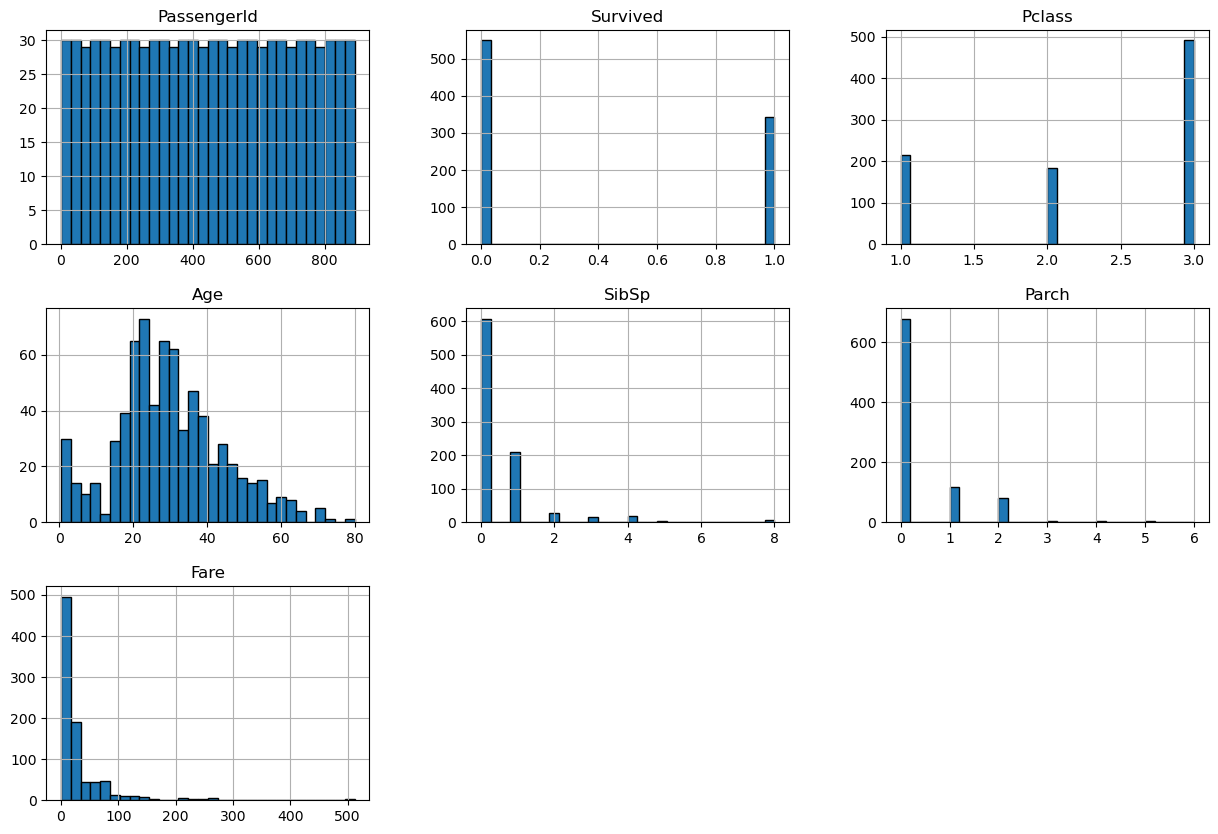

In [6]:
train.hist(figsize=(15,10),bins=30 , edgecolor='black');

<Axes: >

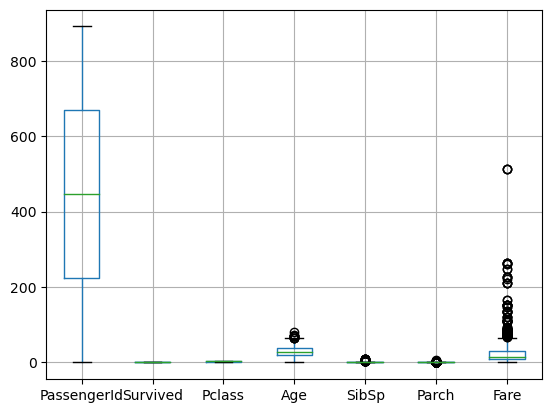

In [7]:
train.boxplot()

### 2. Data Preprocessing:

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
mean=train['Age'].mean()
mean

29.69911764705882

In [11]:
train['Age']=train['Age'].fillna(mean)

In [12]:
train.duplicated().sum()

0

In [13]:
df=train[['Survived','Pclass','Sex','Age']]
df=pd.get_dummies(df, columns=['Pclass','Sex']).astype(int)
df

,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22,0,0,1,0,1
1,1,38,1,0,0,1,0
2,1,26,0,0,1,1,0
3,1,35,1,0,0,1,0
4,0,35,0,0,1,0,1
...,...,...,...,...,...,...,...
886,0,27,0,1,0,0,1
887,1,19,1,0,0,1,0
888,0,29,0,0,1,1,0
889,1,26,1,0,0,0,1


### 3. Model Building:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
y=df['Survived']
x=df.drop('Survived', axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [16]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
model.score(x_test,y_test)

0.7988826815642458

### 4. Model Evaluation:

In [18]:
# the model performed during testing.

from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[93, 17],
       [19, 50]], dtype=int64)

In [19]:
from sklearn.model_selection import cross_val_predict

predictions=cross_val_predict(model,x_train,y_train,cv=3)
confusion_matrix(y_train,predictions)

array([[369,  70],
       [ 85, 188]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report

cl_report=classification_report(y_test, y_predicted)
print(cl_report)

# We can also combine precision and recall into one score, which is called the F-score. 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [21]:
y_score=model.predict_proba(x_test)[:,1]
y_score

array([0.0982051 , 0.0982051 , 0.19032328, 0.91623023, 0.57087418,
       0.47239009, 0.88158088, 0.91070296, 0.507335  , 0.57087418,
       0.10789664, 0.73577316, 0.0982051 , 0.89827845, 0.92871151,
       0.69211415, 0.118419  , 0.32208875, 0.08112416, 0.23092489,
       0.32977216, 0.93320585, 0.0982051 , 0.47239009, 0.62953756,
       0.88158088, 0.08929695, 0.62953756, 0.82472836, 0.77376683,
       0.08649335, 0.66248288, 0.10134621, 0.47239009, 0.0982051 ,
       0.44633928, 0.06256399, 0.25750994, 0.27807497, 0.12257555,
       0.2324137 , 0.11130947, 0.0982051 , 0.15541771, 0.89865369,
       0.0982051 , 0.0982051 , 0.94141495, 0.19097919, 0.28598929,
       0.47239009, 0.52480192, 0.90747285, 0.13382042, 0.47239009,
       0.28515008, 0.22016947, 0.71401048, 0.17467767, 0.0982051 ,
       0.1221191 , 0.57087418, 0.82022268, 0.47239009, 0.58791815,
       0.08929695, 0.84458214, 0.25750994, 0.913181  , 0.93945602,
       0.82972657, 0.31538783, 0.48111435, 0.0982051 , 0.11481

In [22]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
roc_auc

0.8629117259552043

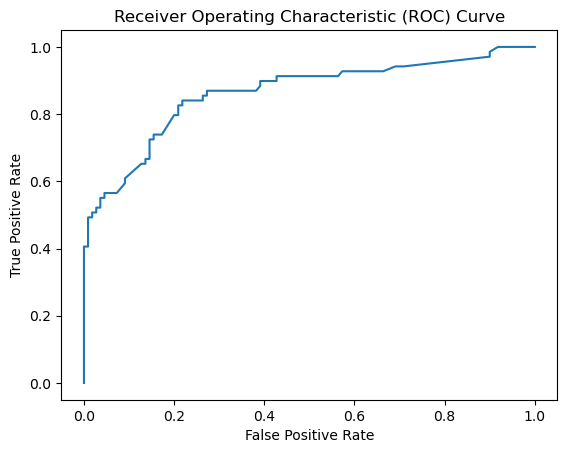

In [23]:
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Interview Questions: